# Deep Learning with Keras

From what I've read, my conceptual understanding of Deep Learning is a subset of machine learning that tries to mimic the process by which the human brain learns. It uses layers of abstraction each of which finetunes the patterns that the alogrithm is understanding. 


In this project, the objective is to classify handwritten digits. Using a neural network to identify the patterns in the images, it will then coalesce those patterns to produce an answer that I hope to be the actual number in the image. 

1.21.6
(60000, 28, 28)
Epoch 1/10
1875/1875 [==============================] - 121s 64ms/step - loss: 0.2047 - accuracy: 0.9393
Epoch 2/10
1875/1875 [==============================] - 119s 63ms/step - loss: 0.0843 - accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 118s 63ms/step - loss: 0.0663 - accuracy: 0.9792
Epoch 4/10
1875/1875 [==============================] - 117s 63ms/step - loss: 0.0540 - accuracy: 0.9831
Epoch 5/10
1875/1875 [==============================] - 117s 63ms/step - loss: 0.0454 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 117s 63ms/step - loss: 0.0403 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 117s 63ms/step - loss: 0.0360 - accuracy: 0.9889
Epoch 8/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.0328 - accuracy: 0.9893
Epoch 9/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.0301 - accuracy: 0.9905
Epoch 10/10
1875/1875 [=========

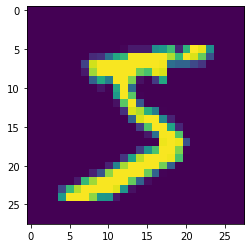

In [12]:
#importing the relevant libraries and packages

import matplotlib
print( np.__version__)

import numpy as np
np.random.seed(123)  #to ensure reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist #the library of training data


#next step is classifying training and testing data

(X_train, y_train), (X_test, y_test) = mnist.load_data() #this is the training and test data
print( X_train.shape ) # there are 60,000 training images, each of which is 28 by 28 pixels

from matplotlib import pyplot as plt
plt.imshow(X_train[0])

#changing the images to only have 1 channel (channel = color --> making it black and white)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#converting the data type to float32 to ensure accuracy and then normalizing the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#problem with class label data is that it is a 1 dimensional array
#but we need 10 distinctive classes for each of the digits that the image could be

# converts the 1D array into a 10 class matrice
Y_train = np_utils.to_categorical(y_train, 10) #the to_categorical() function converts a class of integers to a binary class matrix, 
Y_test = np_utils.to_categorical(y_test, 10) 

#going to be implementing a sequential model for the neural network
#it is a model where each previous layer is the input to the current layer
#each layer will pick up on more and more distinct patterns until it can eventually classify the image as a certain number

model = Sequential()

model.add(Convolution2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
#the line above tells the model how many @D convolution filters to add
#the purpose of these is to find distinct patterns in the 2D images provided
    #it will find these patterns in 3x3 chunks as specified in the code
    #the "relu" part serves as an activation function for the network
model.add(Convolution2D(32, (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
#MaxPooling2D serves as a way to accentuate the bright parts of the image so that the model can more easily pick up on the patterns in the images

model.add(Dropout(0.25))
#to prevent overfitting to the training data, they add this line of code which randomly changes neurons to 0 which decreases the complexity


model.add(Flatten())
#converts the multidimensional arrays fo data to a single dimensionial array to pass the data effectively between every single neuron

model.add(Dense(128, activation='relu'))
#how the model connects layers and adjusts the biases in each neuron ? ~ this part I'm iffy on

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
#softmax will give the probability for each of our class labels (from 1-10)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#lots of videos to understand loss, but essentially... the loss(or cost) function is how the model learns how bad it is at identifying the images
#it slowly optimizes itself using a loss function and a method called "backpropagation gradient descent" to work backwards and adjust the biases
#and weights in the neurons until it achieves a minimum loss (as accurate as possible using so much calculus)

#telling the model to take the data and process it in batches to speed up computational efficiency
model.fit(X_train, Y_train, 
          batch_size=32, epochs=10, verbose=1)

#testing the accuracy of the model
score = model.evaluate(X_test, Y_test, verbose=0)

print(score)


